# Figures of Filtered Saildrone Data

This notebook looks at data from [NOAA/PMEL 2019 Arctic Saildrone Missions](https://data.pmel.noaa.gov/pmel/erddap/search/index.html?page=1&itemsPerPage=1000&searchFor=NOAA%2FPMEL+2019+arctic+saildrone+mission). Used to create timeseries figures of data collected by the saildrones, filtered to only store variables of interest.

Import Python modules

In [1]:
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'FC_SD'

Import data and store datasets into a list

In [2]:
SD_INPATH = 'D:/saildrone/filtered/'
FIGPATH = 'D:/research/figures/test/'

In [7]:
saildrone_files = os.listdir(SD_INPATH)

saildrones = []
for fname in saildrone_files: 
    saildrones.append(xr.open_dataset(SD_INPATH+fname))
saildrones

[<xarray.Dataset>
 Dimensions:          (time: 197608)
 Coordinates:
     trajectory       float32 ...
   * time             (time) datetime64[ns] 2019-05-16T22:00:00 ... 2019-10-01...
     latitude         (time) float64 ...
     longitude        (time) float64 ...
 Data variables:
     TEMP_AIR_MEAN    (time) float64 ...
     BARO_PRES_MEAN   (time) float64 ...
     UWND_MEAN        (time) float64 ...
     VWND_MEAN        (time) float64 ...
     TEMP_SBE37_MEAN  (time) float64 ...
     RH_MEAN          (time) float64 ...,
 <xarray.Dataset>
 Dimensions:          (time: 189732)
 Coordinates:
   * time             (time) datetime64[ns] 2019-05-14T22:00:00 ... 2019-09-24...
     trajectory       float32 ...
     latitude         (time) float64 ...
     longitude        (time) float64 ...
 Data variables:
     TEMP_AIR_MEAN    (time) float64 ...
     BARO_PRES_MEAN   (time) float64 ...
     UWND_MEAN        (time) float64 ...
     VWND_MEAN        (time) float64 ...
     TEMP_SBE37_MEAN 

View variables in filtered data

In [8]:
sdvars = [i for i in saildrones[0].data_vars]
sdvars

['TEMP_AIR_MEAN',
 'BARO_PRES_MEAN',
 'UWND_MEAN',
 'VWND_MEAN',
 'TEMP_SBE37_MEAN',
 'RH_MEAN']

Create timeseries of each varaible

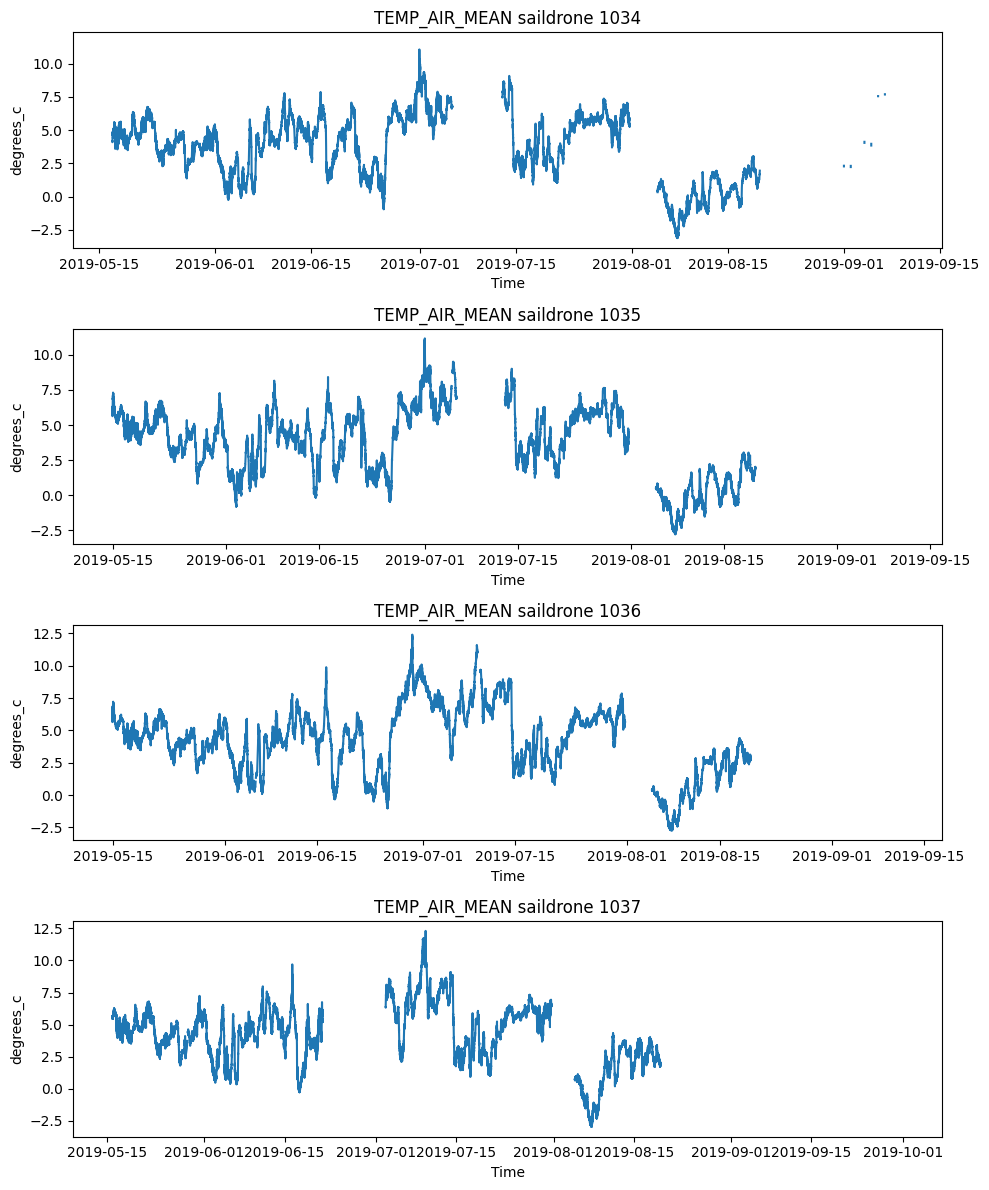

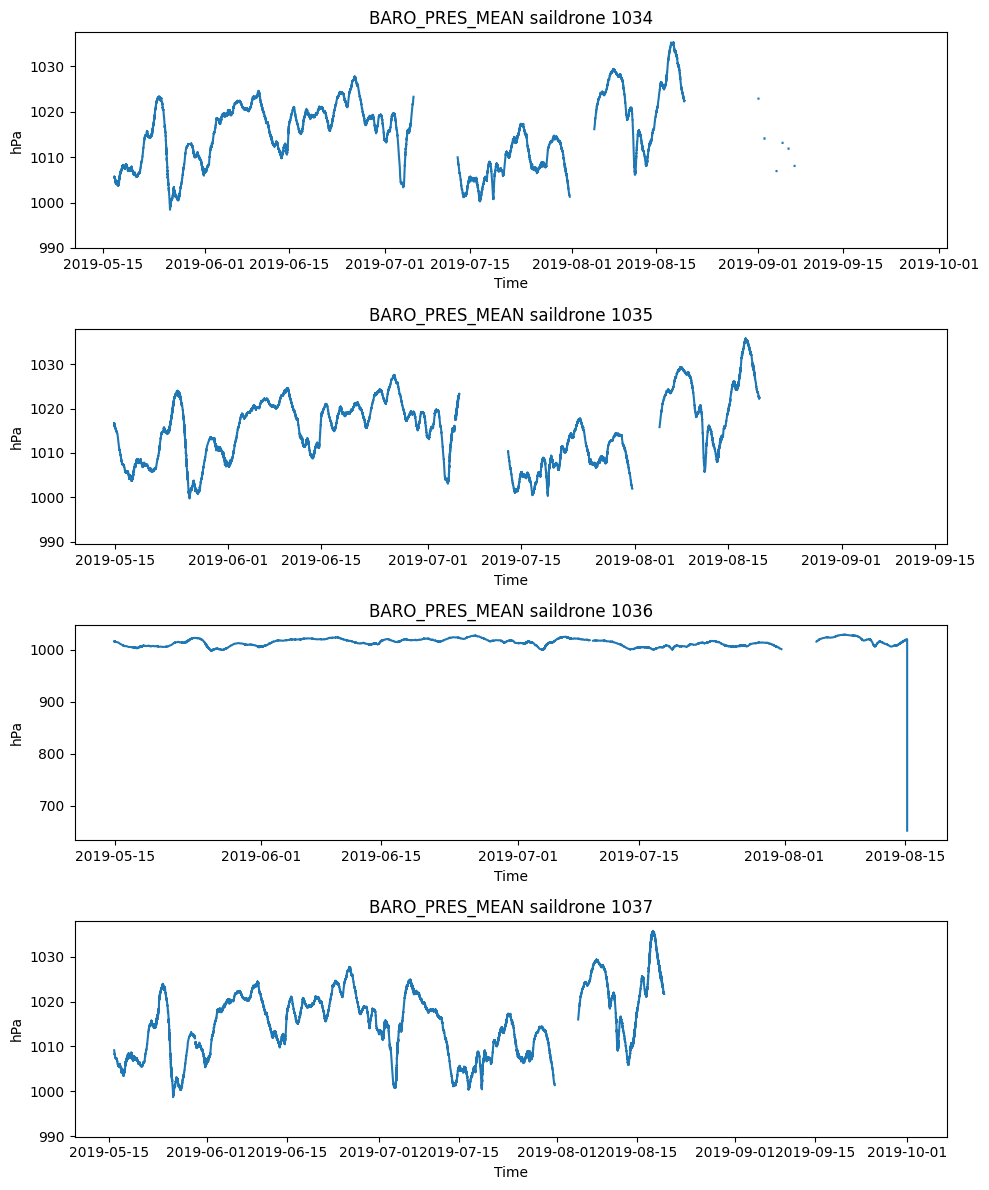

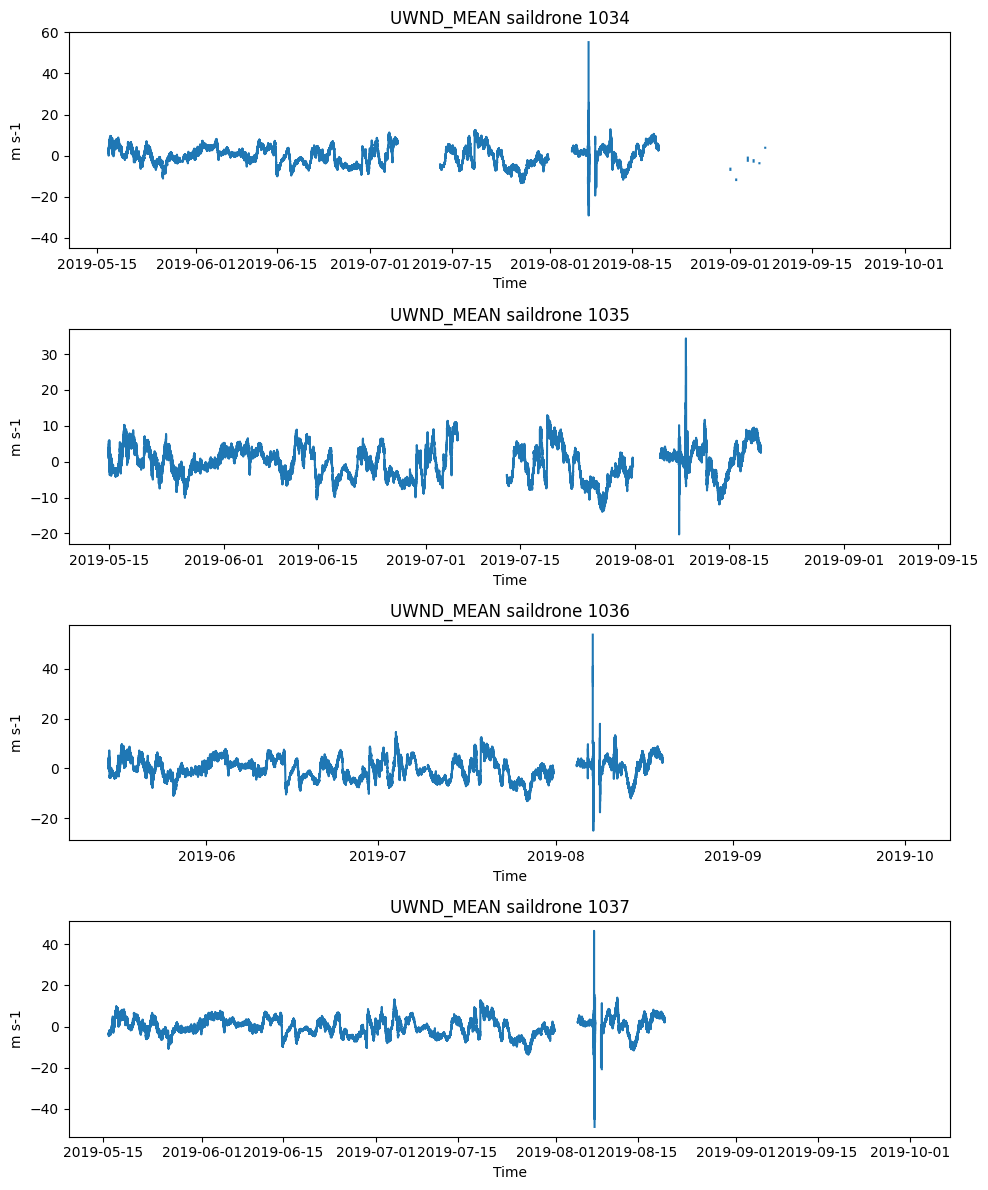

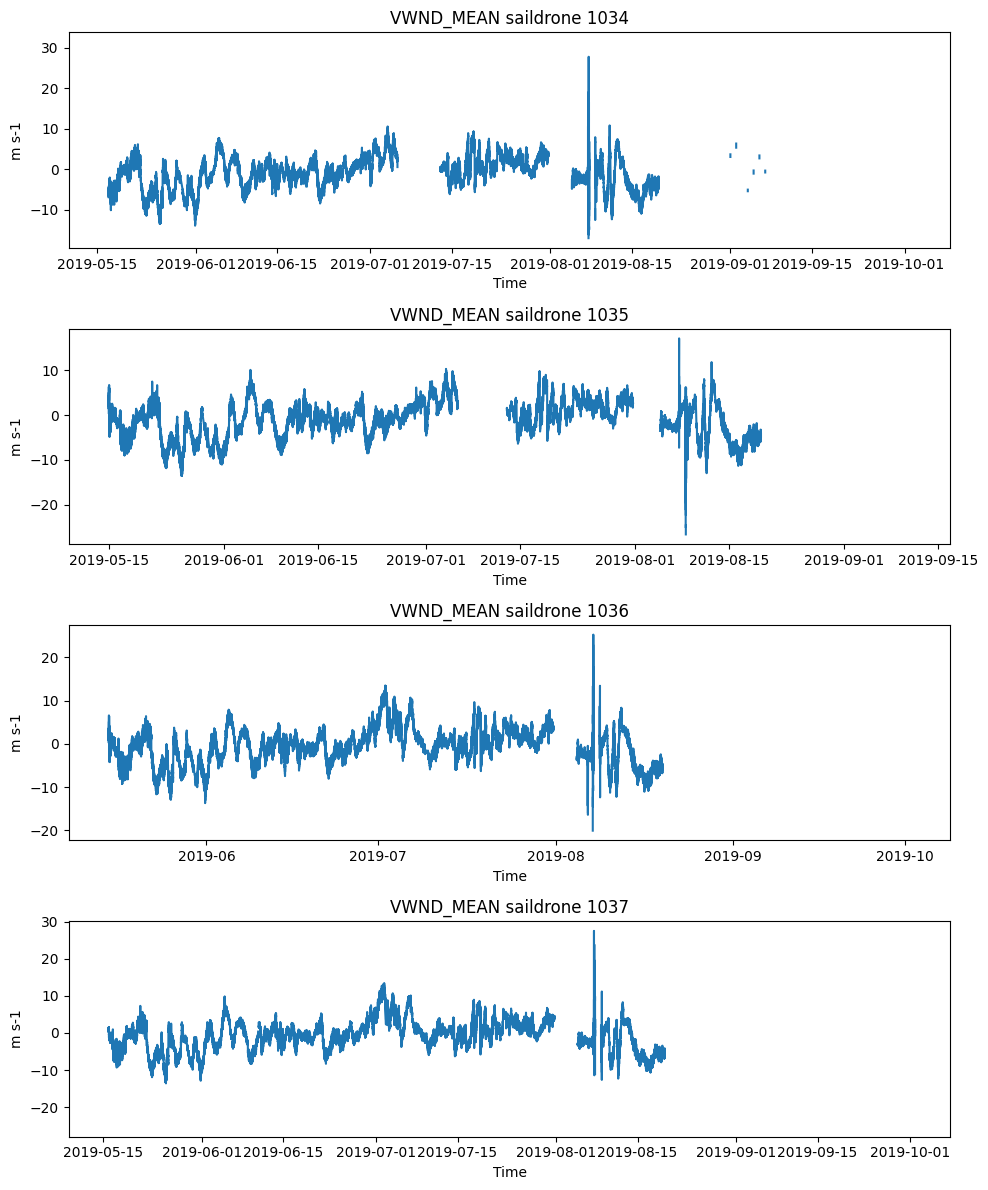

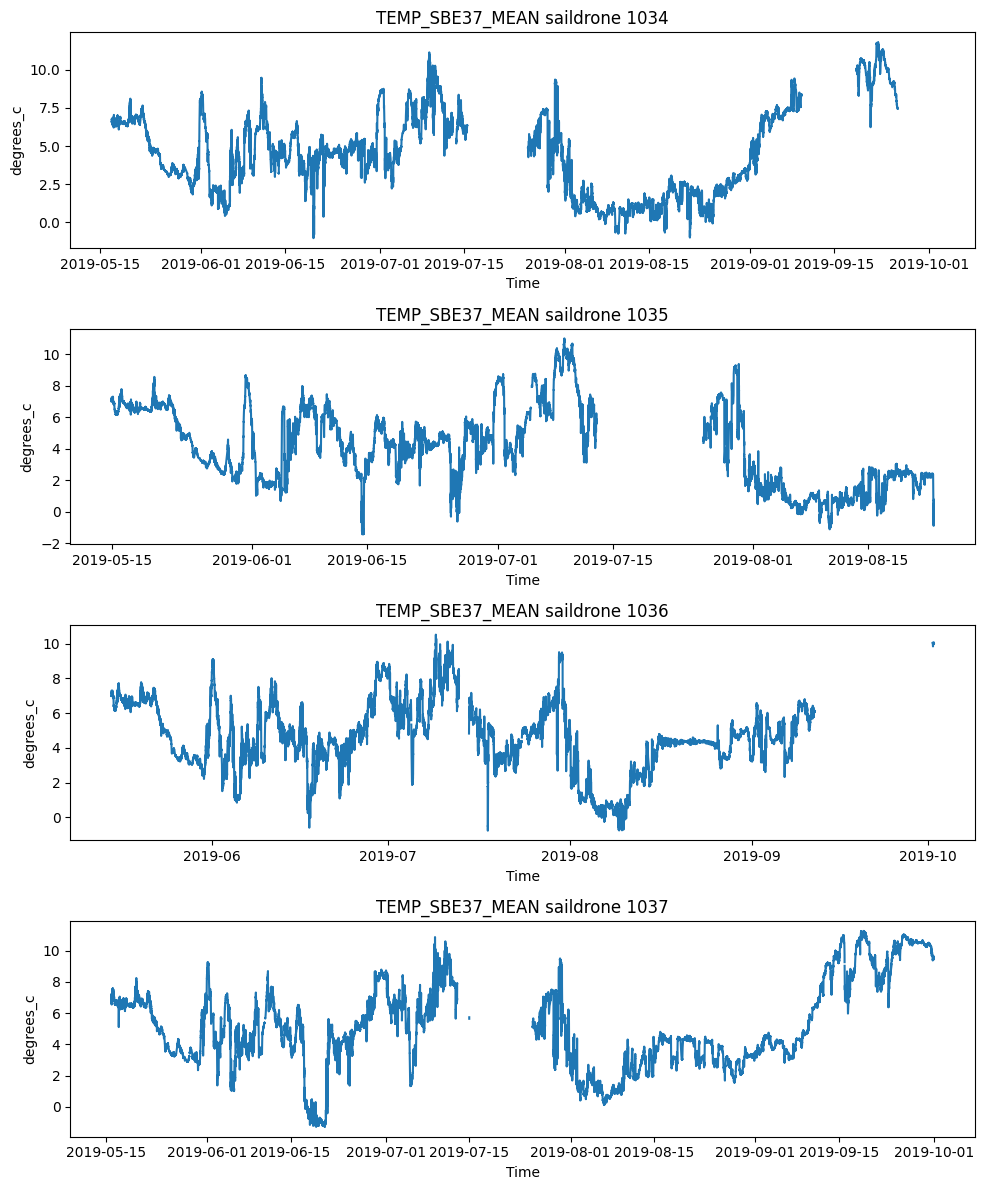

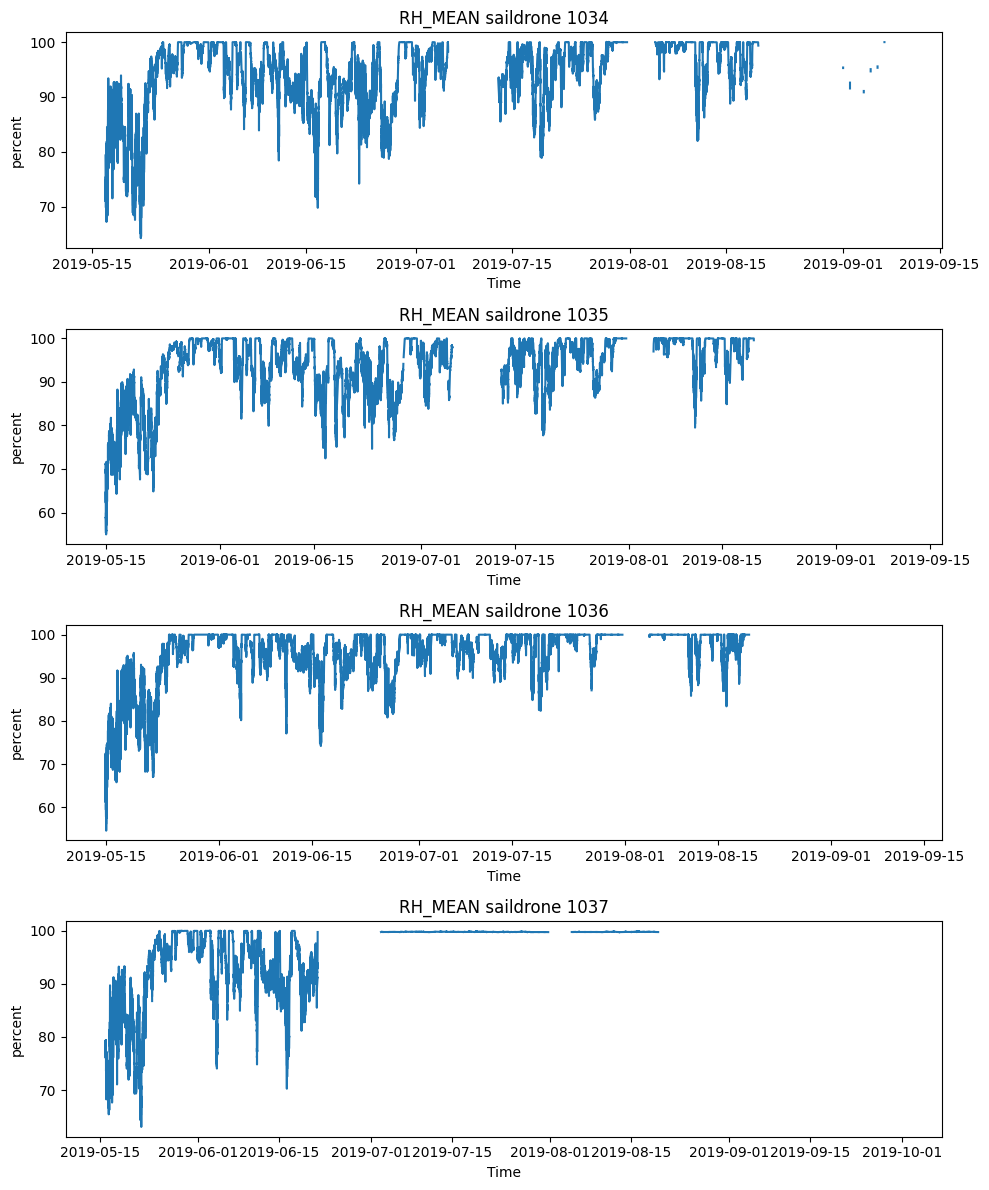

In [20]:
savefig = False  # whether or not to save these figures

for sdvar in sdvars:
    fig = plt.figure(figsize=(10,12))
    for i,sd in enumerate(saildrones):
        ax = fig.add_subplot(4, 1, i+1)
        ax.plot(sd.time, sd[sdvar])
        ax.set_title(sdvar + ' saildrone '+str(int(sd.trajectory.values)))
        ax.set_ylabel(sd[sdvar].units)
        ax.set_xlabel('Time')

    fig.tight_layout()
    if savefig:
        fig_name = 'saildrone_'+sdvar+'.png'
        fig.savefig(FIGPATH+fig_name, dpi=80, facecolor='w')    